In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn import metrics
import os
from sklearn.preprocessing import normalize

### Save 10 repo_commits to a list

In [2]:
cm_files = [file for file in os.listdir() if 'cleaned.pk1' in file]
cm_files

['adamsmith_commits_cleaned.pk1',
 'embulk_commits_cleaned.pk1',
 'google_commits_cleaned.pk1',
 'guillaume_commits_cleaned.pk1',
 'iven_commits_cleaned.pk1',
 'microsoft_commits_cleaned.pk1',
 'oleiade_commits_cleaned.pk1',
 'pandas_commits_cleaned.pk1',
 'yang_commits_cleaned.pk1',
 'zhn_commits_cleaned.pk1']

In [3]:
# Check shape
for file in cm_files:
    print(file, pd.read_pickle(file).shape)

adamsmith_commits_cleaned.pk1 (2, 16)
embulk_commits_cleaned.pk1 (2646, 16)
google_commits_cleaned.pk1 (2635, 16)
guillaume_commits_cleaned.pk1 (3, 16)
iven_commits_cleaned.pk1 (51, 16)
microsoft_commits_cleaned.pk1 (42, 16)
oleiade_commits_cleaned.pk1 (547, 16)
pandas_commits_cleaned.pk1 (20036, 16)
yang_commits_cleaned.pk1 (197, 16)
zhn_commits_cleaned.pk1 (37, 16)


### Save to df

In [4]:
adamsmith = pd.read_pickle(cm_files[0])
embulk = pd.read_pickle(cm_files[1])
google = pd.read_pickle(cm_files[2])
guillaume = pd.read_pickle(cm_files[3])
iven = pd.read_pickle(cm_files[4])
microsoft = pd.read_pickle(cm_files[5])
oleiade = pd.read_pickle(cm_files[6])
pandas = pd.read_pickle(cm_files[7])
yang = pd.read_pickle(cm_files[8])
zhn = pd.read_pickle(cm_files[9])

In [5]:
adamsmith

,assocPR_author,assocPR_authorAssociation,assocPR_closedAt,assocPR_createdAt,assocPR_id,assocPR_number,assocPR_state,assocPR_title,assocPR_updatedAt,committer_company,committer_author,status_id,status_state,committedDate,messageHeadline,oid
0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,@kiteco,adamsmith,NaN,NaN,2013-01-19T02:25:04Z,Initial commit,6fa9d57ffb25b1b3bf9d714d26f0d4691881436b
1,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,@kiteco,adamsmith,NaN,NaN,2013-01-19T02:21:47Z,Initial commit,cb10cb8b2c7d194f75930f423714b5054420734f


### Create Function to get counts per month

In [6]:
def monthly_count(df):
    
    # Change to pandas datetime object
    df['committedDate'] =  df['committedDate'].apply(pd.Timestamp)
    
    # Group by committedDate's month and get the count
    df_group = df.groupby(df['committedDate'].dt.to_period('M')) \
                                                 .count()['oid'] \
                                                 .reset_index() \
                                                 .rename(columns={'oid': 'countByMonth'})
    
    # Normalize count and create a insert back into df_group
    df_group['countByMonthNorm'] = normalize([df_group['countByMonth']])[0]
    
    return df_group

### Save to a new df for monthly counts

In [7]:
adamsmith_mth = monthly_count(adamsmith)
embulk_mth = monthly_count(embulk)
google_mth = monthly_count(google)
guillaume_mth = monthly_count(guillaume)
iven_mth = monthly_count(iven)
microsoft_mth = monthly_count(microsoft)
oleiade_mth = monthly_count(oleiade)
pandas_mth = monthly_count(pandas)
yang_mth = monthly_count(yang)
zhn_mth = monthly_count(zhn)

C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Convertin

### Save monthly counts and strings to a seperate list

In [8]:
monthly_count_list = [adamsmith_mth, embulk_mth, google_mth, guillaume_mth, iven_mth, 
microsoft_mth, oleiade_mth, pandas_mth, yang_mth, zhn_mth]

monthly_count_list_str = ['adamsmith_mth', 'embulk_mth', 'google_mth', 'guillaume_mth', 'iven_mth', 
'microsoft_mth', 'oleiade_mth', 'pandas_mth', 'yang_mth', 'zhn_mth']

# Dyanmic Time Warping

In [9]:
from tslearn.metrics import dtw_path

### Loop over the monthly count list and to calculate dtw

In [10]:
def calc_dtw(commit_num):
    dtw = []
    path = []
    for el in range(len(monthly_count_list)):
        dtw_pathing = dtw_path(monthly_count_list[commit_num].iloc[:,-1].tolist(), monthly_count_list[el].iloc[:,-1].tolist())
        dtw.append((monthly_count_list_str[commit_num], monthly_count_list_str[el], dtw_pathing[1]))
        path.append((monthly_count_list_str[commit_num], monthly_count_list_str[el], dtw_pathing[0]))
        
    return dtw, path

In [11]:
dtw_1, path_1 = calc_dtw(1)

### Plot Graph

In [12]:
def plot_graph(dtw, start_dtw, compare_dtw):
    print(dtw[compare_dtw])
    monthly_count_list[start_dtw].plot(x='committedDate', y='countByMonthNorm')
    monthly_count_list[compare_dtw].plot(x='committedDate', y='countByMonthNorm')

('embulk_mth', 'iven_mth', 0.4943276355243283)


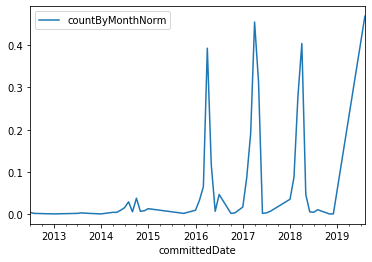

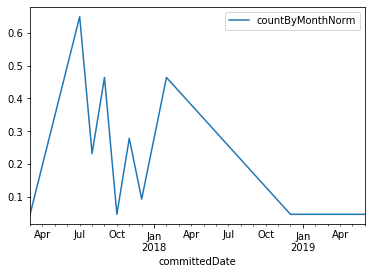

In [13]:
plot_graph(dtw_1, 2, 4)

### Make Dictionary

In [14]:
def make_dict(num):
    
    dtw_1, path_1 = calc_dtw(num)
    my_dict = {dtw_1[i][1]:dtw_1[i][2] for i in range(len(dtw_1))}
    
    return my_dict

In [15]:
adamsmith_dict = make_dict(0)
embulk_dict = make_dict(1)
google_dict = make_dict(2)
guillaume_dict = make_dict(3)
iven_dict = make_dict(4)
microsoft_dict = make_dict(5)
oleiade_dict = make_dict(6)
pandas_dict = make_dict(7)
yang_dict = make_dict(8)
zhn_dict = make_dict(9)

dict_list = [adamsmith_dict, embulk_dict, google_dict, guillaume_dict, iven_dict, 
             microsoft_dict, oleiade_dict, pandas_dict, yang_dict, zhn_dict]

### Make DF

In [16]:
df = pd.Series()
for el in range(len(dict_list)):
    df = pd.concat([df, pd.Series(dict_list[el], name=monthly_count_list_str[el])], axis=1)
df = df.drop(columns=0)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df

,adamsmith_mth,embulk_mth,google_mth,guillaume_mth,iven_mth,microsoft_mth,oleiade_mth,pandas_mth,yang_mth,zhn_mth
adamsmith_mth,0.000000,6.896988,6.361666,0.000000,2.503970,2.209631,3.658880,10.222556,3.797498,1.885109
embulk_mth,6.896988,0.000000,0.668144,6.896988,0.494328,0.700625,0.495343,0.546690,1.033986,1.185475
google_mth,6.361666,0.668144,0.000000,6.361666,0.655334,0.973834,0.550339,0.740744,1.286794,1.280312
guillaume_mth,0.000000,6.896988,6.361666,0.000000,2.503970,2.209631,3.658880,10.222556,3.797498,1.885109
iven_mth,2.503970,0.494328,0.655334,2.503970,0.000000,0.602422,0.379931,0.787129,1.026719,1.172385
microsoft_mth,2.209631,0.700625,0.973834,2.209631,0.602422,0.000000,0.578733,0.954588,0.884513,0.885385
oleiade_mth,3.658880,0.495343,0.550339,3.658880,0.379931,0.578733,0.000000,0.623247,1.089423,1.159664
pandas_mth,10.222556,0.546690,0.740744,10.222556,0.787129,0.954588,0.623247,0.000000,1.070044,1.079823
yang_mth,3.797498,1.033986,1.286794,3.797498,1.026719,0.884513,1.089423,1.070044,0.000000,0.293465
zhn_mth,1.885109,1.185475,1.280312,1.885109,1.172385,0.885385,1.159664,1.079823,0.293465,0.000000


In [18]:
df.to_csv('commits_dtw.csv', index=False)

# [Hiearchical Clustering](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [41.25, 41.25, 82.5, 82.5],
  [10.0, 10.0, 61.875, 61.875]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 2.1694202565162843, 2.1694202565162843, 0.0],
  [0.0, 1.1014777464405774, 1.1014777464405774, 0.0],
  [0.0, 2.3413380833327033, 2.3413380833327033, 1.1014777464405774],
  [2.1694202565162843, 3.40030321507333, 3.40030321507333, 2.3413380833327033],
  [0.0, 1.2961958406104068, 1.2961958406104068, 0.0],
  [0.0, 5.949573844976945, 5.949573844976945, 1.2961958406104068],
  [3.40030321507333,
   13.891531883236134,
   13.891531883236134,
   5.949573844976945],
  [0.0, 27.098816886534898, 27.098816886534898, 13.891531883236134]],
 'ivl': ['adamsmith_mth',
  'guillaume_mth',
  'oleiade_mth',
  'yang_mth',
  'zhn_mth',
  'iven_mth',
  'microsoft_mth',
  'pandas_mth',
  'embulk_mth',
  'goog

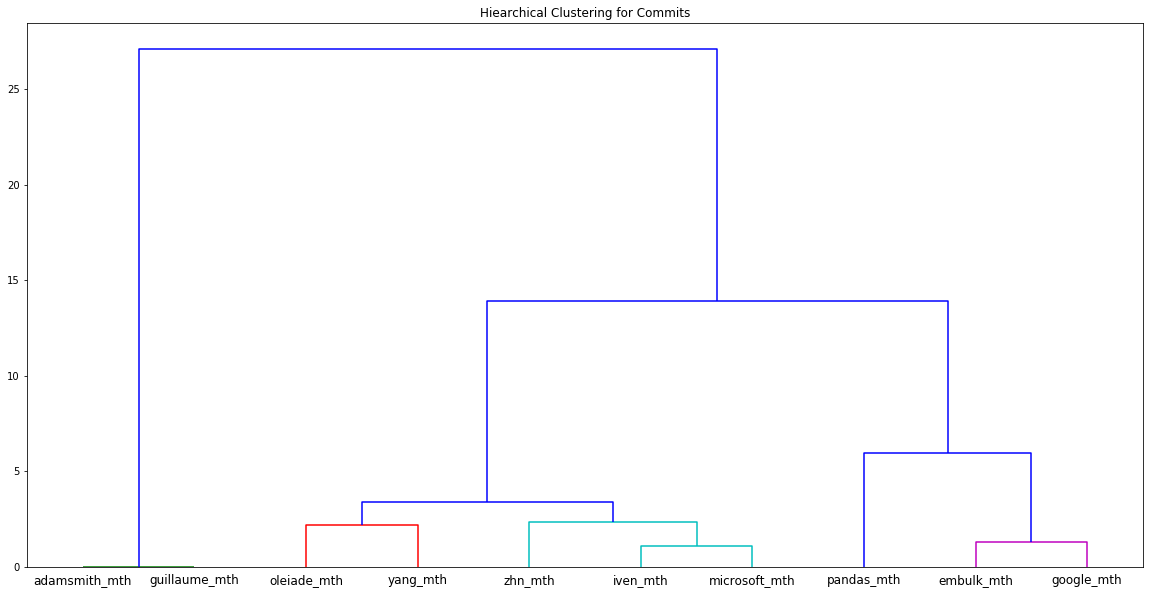

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df.as_matrix(), 'ward')
labelList = df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering for Commits')
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=3)
# plt.show()

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Dustin\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


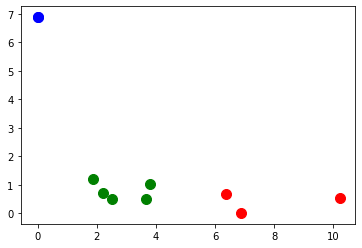

In [114]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

X = df.as_matrix()

y = hc.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 2')